<a href="https://colab.research.google.com/github/al34n1x/DataScience/blob/master/8.Machine_Learning/21_ejercicio_logr_solved_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

In [41]:
!cp drive/MyDrive/evaluacion_funciones.py .

In [42]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import preprocessing, svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from evaluacion_funciones import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [43]:
# Read CSV train data file into DataFrame
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/20231030/train.csv")

# Read CSV test data file into DataFrame
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/20231030/test.csv")

# preview train data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


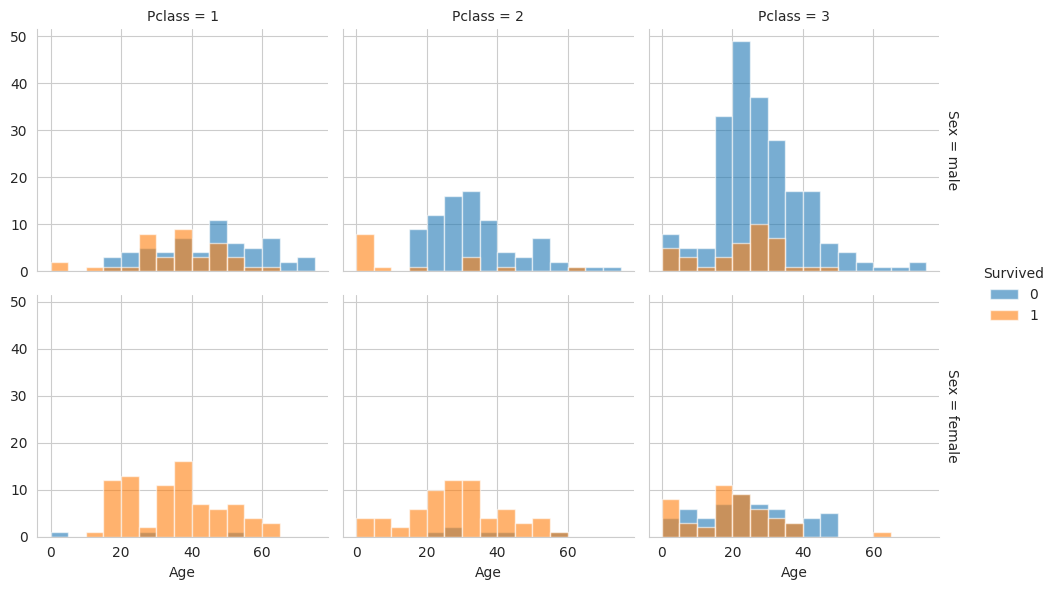

In [44]:
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(train_df, row='Sex', col='Pclass', hue='Survived', margin_titles=True, aspect=1.1)
g.map(sns.distplot, 'Age', kde=False, bins=bins, hist_kws=dict(alpha=0.6))
g.add_legend()
plt.show()

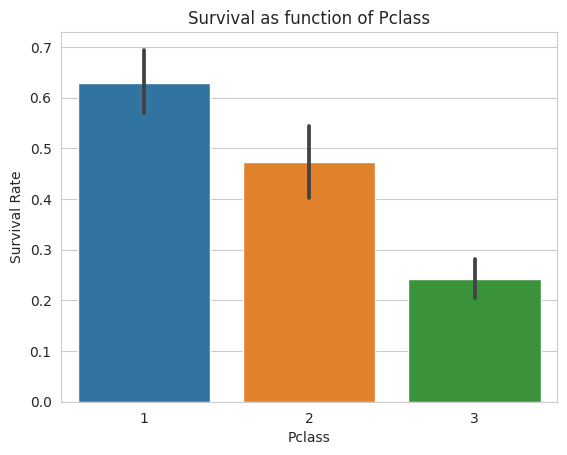

In [45]:
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass")
plt.show()

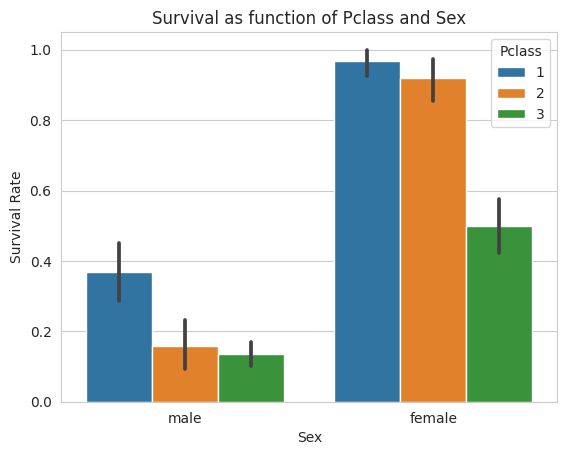

In [46]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=train_df)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass and Sex")
plt.show()

## Preparación de datos

<Axes: >

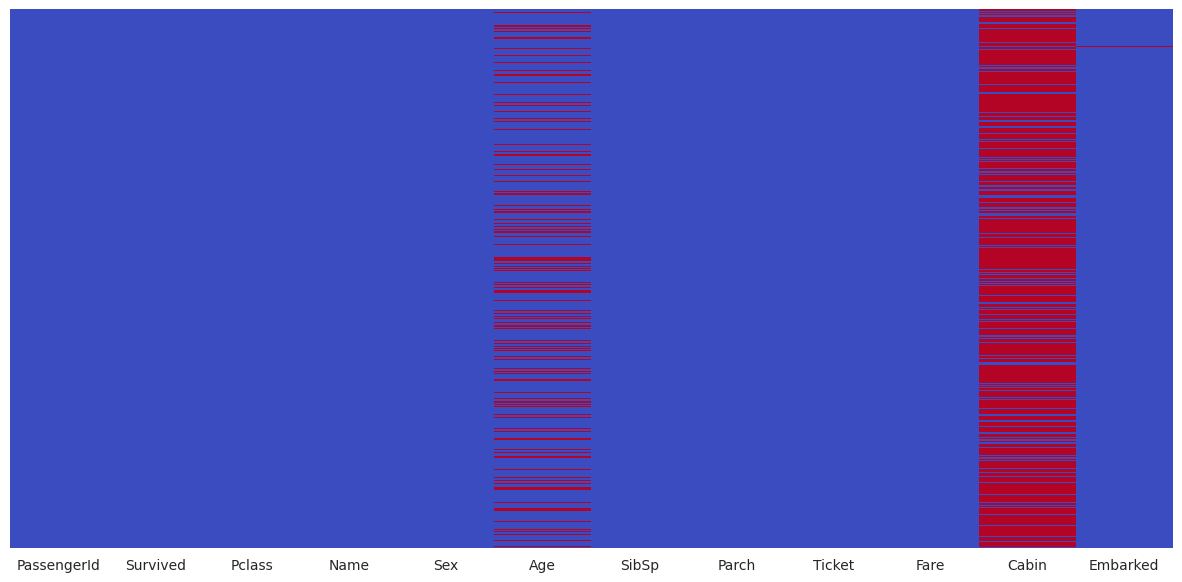

In [47]:
plt.figure(figsize=(15, 7))
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [48]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [49]:
print('Percent of missing "Age" records is %.2f%%' %((train_df['Age'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Age" records is 19.87%


In [50]:
print('Percent of missing "Cabin" records is %.2f%%' %((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


In [51]:
print('Percent of missing "Embarked" records is %.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


<Axes: xlabel='Survived', ylabel='count'>

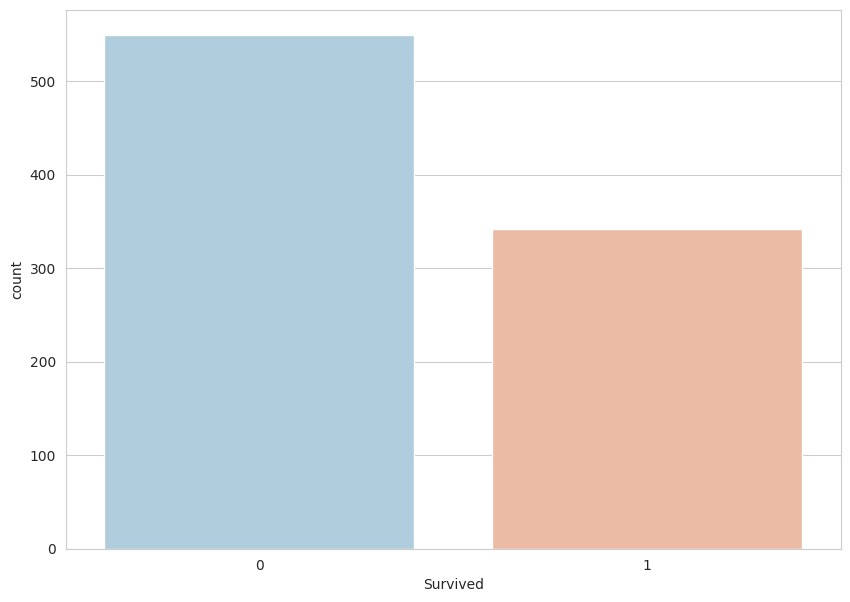

In [52]:
plt.figure(figsize=(10, 7))
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train_df,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

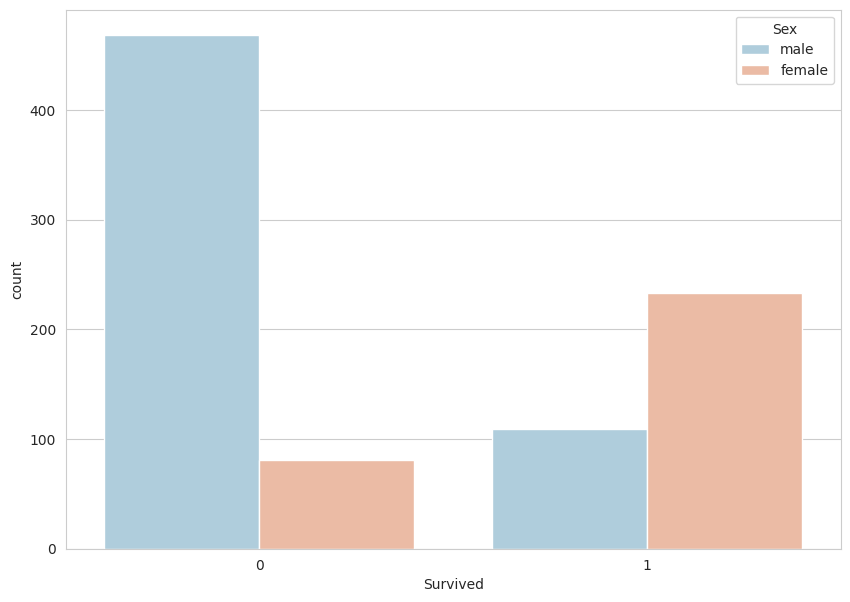

In [53]:
plt.figure(figsize=(10, 7))
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train_df,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

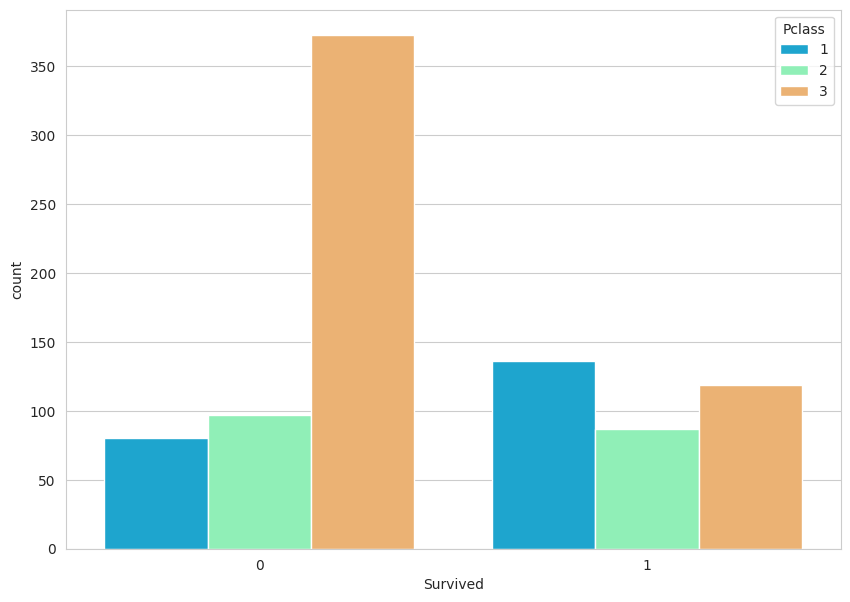

In [54]:
plt.figure(figsize=(10, 7))
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train_df,palette='rainbow')

In [55]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

In [56]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [57]:
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

In [58]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


In [59]:
#create categorical variables and drop some variables
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,0,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,1,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,0,1


In [60]:
test_data = test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)
test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)


In [61]:

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,0,1
4,22.0,12.2875,0,0,0,1,0,0,1,1,0


In [62]:
final_train.isnull().sum()

Survived       0
Age            0
Fare           0
TravelAlone    0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Sex_female     0
Sex_male       0
dtype: int64

In [63]:
final_test.isnull().sum()

Age            0
Fare           0
TravelAlone    0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Sex_female     0
Sex_male       0
dtype: int64

In [64]:
final_train['IsMinor']=np.where(final_train['Age']<=16, 1, 0)
final_test['IsMinor']=np.where(final_test['Age']<=16, 1, 0)

In [65]:
Selected_features = ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C',
                     'Embarked_S', 'Sex_male', 'IsMinor']
X = final_train[Selected_features]

## Cross Validation

In [66]:
# 5) Construcción del algoritmo de aprendizaje.
# algoritmos = {'LOGR': LogisticRegression(penalty='l1',
#                                          solver='saga',
#                                          max_iter=1000,
#                                          random_state=42,
#                                          multi_class='ovr')}

algoritmos = {'LOGR': LogisticRegression()}

## Entrenamiento del modelo definitivo

In [68]:
cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_female", "Sex_male", "IsMinor"]
X = final_train[cols]
y = final_train['Survived']

# Build a logreg and compute the feature importances
# model = LogisticRegression(penalty='l1',
#                            solver='saga',
#                            max_iter=1000,
#                            random_state=42,
#                            multi_class='ovr')

model = LogisticRegression()

In [69]:
# create the RFE model and select 8 attributes
rfe = RFE(model, step = 20)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Pclass_1', 'Pclass_2', 'Sex_female', 'Sex_male', 'IsMinor']


Train/Test split results:
LogisticRegression accuracy is 0.570
LogisticRegression log_loss is 0.638
LogisticRegression auc is 0.797


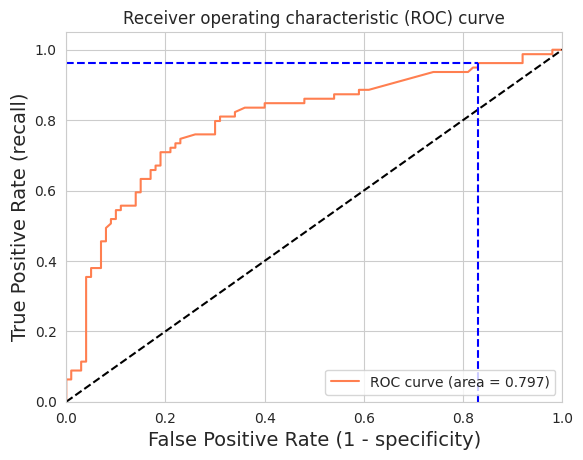

Using a threshold of 0.297 guarantees a sensitivity of 0.962 and a specificity of 0.170, i.e. a false positive rate of 83.00%.


In [70]:
# create X (features) and y (response)
X = final_train[Selected_features]
y = final_train['Survived']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression(penalty='l1',
                           solver='saga',
                           max_iter=10,
                           random_state=42,
                           multi_class='ovr')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +
      "and a specificity of %.3f" % (1-fpr[idx]) +
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))



In [71]:
npX = np.array(X).copy()
npy = np.array(y).copy()

In [72]:
clf_rf = RandomForestClassifier()
clf_et = ExtraTreesClassifier()
clf_bc = BaggingClassifier()
clf_ada = AdaBoostClassifier()
clf_dt = DecisionTreeClassifier()
clf_xg = XGBClassifier()
clf_svm = SVC()

In [73]:
Classifiers = ['RandomForest','ExtraTrees','Bagging','AdaBoost','DecisionTree','XGBoost','SVM']
scores = []
models = [clf_rf, clf_et, clf_bc, clf_ada, clf_dt, clf_xg, clf_svm]
for model in models:
    score = cross_val_score(model, npX, npy, scoring = 'accuracy', cv = 10, n_jobs = -1).mean()
    scores.append(score)

In [74]:
mode = pd.DataFrame(scores, index = Classifiers, columns = ['score']).sort_values(by = 'score',
             ascending = False)
mode

,score
XGBoost,0.809276
AdaBoost,0.798002
RandomForest,0.792459
Bagging,0.791286
ExtraTrees,0.790187
DecisionTree,0.786816
SVM,0.631910
